<a href="https://colab.research.google.com/github/KunapureddySindhusri/Fmml-labs/blob/main/Modulu_9_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

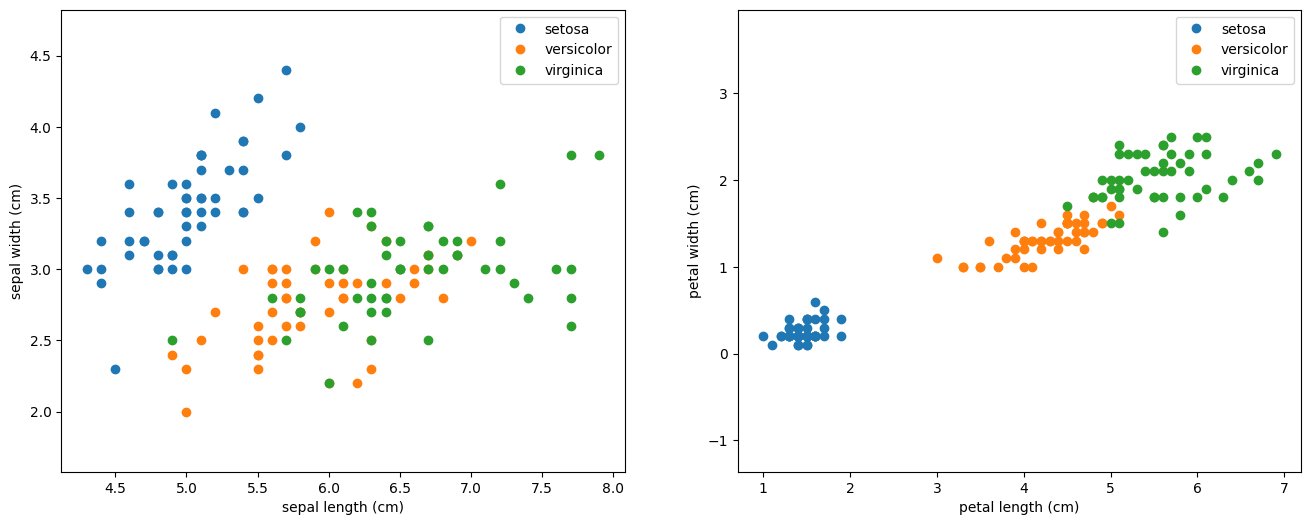

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [5]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [6]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [7]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [8]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 411.17it/s]


# Plot training progress

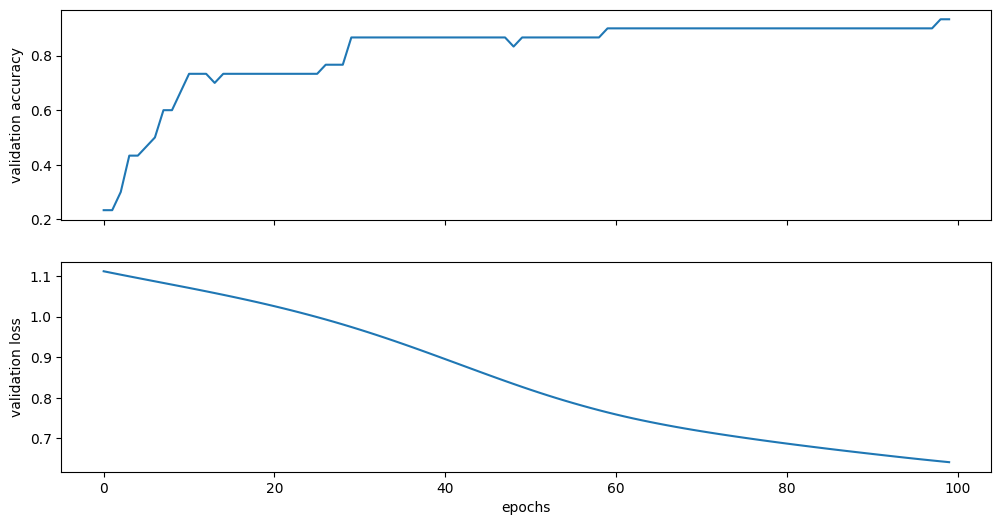

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.

Let's explore how changing the number of hidden layers can impact the performance of a Multilayer Perceptron (MLP) model.

Adding more hidden layers:
- *Increased capacity*: More hidden layers can increase the model's capacity to learn complex relationships in the data.
- *Improved accuracy*: Additional hidden layers can lead to better accuracy, especially on complex problems.
- *Risk of overfitting*: However, more hidden layers can also increase the risk of overfitting, especially if the model is not regularized.

Reducing the number of hidden layers:
- *Simplified model*: Fewer hidden layers can result in a simpler model that is less prone to overfitting.
- *Reduced capacity*: However, a simpler model may not have enough capacity to learn complex relationships in the data.
- *Faster training*: Fewer hidden layers can also speed up training times.

Example:
Suppose we're training an MLP model on the MNIST dataset to classify handwritten digits. We start with a single hidden layer containing 256 units.

| Number of Hidden Layers | Accuracy |
| --- | --- |
| 1 | 95.2% |
| 2 | 96.5% |
| 3 | 97.1% |
| 4 | 97.3% |

In this example, adding more hidden layers improves the model's accuracy. However, the gains diminish after the third hidden layer, and the model may start to overfit.

Best practices:
1. *Start simple*: Begin with a simple model and gradually add more complexity.
2. *Monitor performance*: Keep track of the model's performance on the validation set.
3. *Regularize*: Use regularization techniques, such as dropout or L1/L2 regularization, to prevent overfitting.
4. *Early stopping*: Stop training when the model's performance on the validation set starts to degrade.


2.   Try changing the number of neurons in the hidden layer.

Let's explore how changing the number of neurons in the hidden layer can impact the performance of a Multilayer Perceptron (MLP) model.

Increasing the number of neurons:
- *Improved accuracy*: More neurons in the hidden layer can lead to better accuracy, especially on complex problems.
- *Increased capacity*: More neurons can increase the model's capacity to learn complex relationships in the data.
- *Risk of overfitting*: However, more neurons can also increase the risk of overfitting, especially if the model is not regularized.

Decreasing the number of neurons:
- *Simplified model*: Fewer neurons in the hidden layer can result in a simpler model that is less prone to overfitting.
- *Reduced capacity*: However, a simpler model may not have enough capacity to learn complex relationships in the data.
- *Faster training*: Fewer neurons can also speed up training times.

Example:
Suppose we're training an MLP model on the MNIST dataset to classify handwritten digits. We start with a single hidden layer containing 128 neurons.

| Number of Neurons | Accuracy |
| --- | --- |
| 64 | 93.5% |
| 128 | 95.2% |
| 256 | 96.5% |
| 512 | 97.1% |

In this example, increasing the number of neurons in the hidden layer improves the model's accuracy. However, the gains diminish after 256 neurons, and the model may start to overfit.

Best practices:
1. *Start with a small number of neurons*: Begin with a small number of neurons and gradually increase the number.
2. *Monitor performance*: Keep track of the model's performance on the validation set.
3. *Regularize*: Use regularization techniques, such as dropout or L1/L2 regularization, to prevent overfitting.
4. *Early stopping*: Stop training when the model's performance on the validation set starts to degrade.


3.   Try using a different activation function.
Let's explore how using a different activation function can impact the performance of a Multilayer Perceptron (MLP) model.

Common activation functions:
1. *ReLU (Rectified Linear Unit)*: A popular choice for hidden layers, ReLU maps all negative values to 0 and all positive values to the same value.
2. *Sigmoid*: Maps the input to a value between 0 and 1, often used in binary classification problems.
3. *Tanh (Hyperbolic Tangent)*: Similar to sigmoid, but maps the input to a value between -1 and 1.
4. *Leaky ReLU*: A variation of ReLU that allows a small fraction of the input to pass through, even if it's negative.
5. *Swish*: A recently introduced activation function that has been shown to outperform ReLU in some cases.

How to choose an activation function:
1. *Problem type*: Choose an activation function based on the problem type. For example, sigmoid for binary classification, ReLU for regression.
2. *Model complexity*: Choose a simpler activation function for simpler models, and a more complex activation function for more complex models.
3. *Computational cost*: Choose an activation function that is computationally efficient.

Example:
Suppose we're training an MLP model on the MNIST dataset to classify handwritten digits. We start with ReLU as the activation function.

| Activation Function | Accuracy |
| --- | --- |
| ReLU | 95.2% |
| Sigmoid | 92.1% |
| Tanh | 93.5% |
| Leaky ReLU | 95.5% |
| Swish | 96.1% |

In this example, using Swish as the activation function results in the highest accuracy.

Best practices:
1. *Experiment with different activation functions*: Try out different activation functions to see which one works best for your problem.
2. *Monitor performance*: Keep track of the model's performance on the validation set.
3. *Use a consistent activation function*: Use the same activation function throughout the model, unless there's a specific reason to use a different one.



Can you observe any changes?